In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [2]:
import pandas as pd

corpus = []

df = pd.read_csv("SMSSpamCollection", sep="\t", names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
for i in range(0,len(df)):
    rev = re.sub('[^a-zA-Z]', ' ', df['message'][i]) #removing special characters, punctuation
    rev = rev.lower() #changing to lowercase
    rev = rev.split()
    rev = [ps.stem(wrd) for wrd in rev if wrd not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus.append(rev)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdv = TfidfVectorizer()
x = tdv.fit_transform(corpus).toarray()

In [5]:
y = pd.get_dummies(df['label'])
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


<Axes: ylabel='count'>

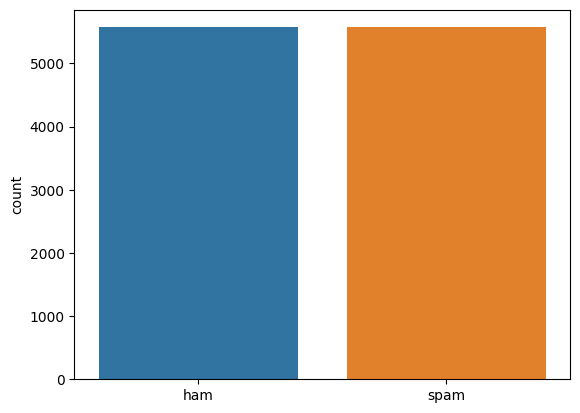

In [6]:
import seaborn as sns

sns.countplot(y)
#Balanced dataset, don't need to rebalance it

In [7]:
y = y.iloc[:,1].values # .values to get an array of only the spam column
y

array([False, False,  True, ..., False, False, False])

In [25]:
# # balance dataset: Combine over- and under-sampling using SMOTE and Tomek links
# from imblearn.combine import SMOTETomek 

# smt = SMOTETomek(random_state=42)

# x_bal, y_bal = smt.fit_resample(x, y)

In [8]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(xtrain, ytrain)

ypred = spam_detect_model.predict(xtest)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

print("Accuracy Score: ", accuracy_score(ypred, ytest))
print("\nPrecision Score: ", precision_score(ypred, ytest))

Accuracy Score:  0.9695067264573991

Precision Score:  0.7875


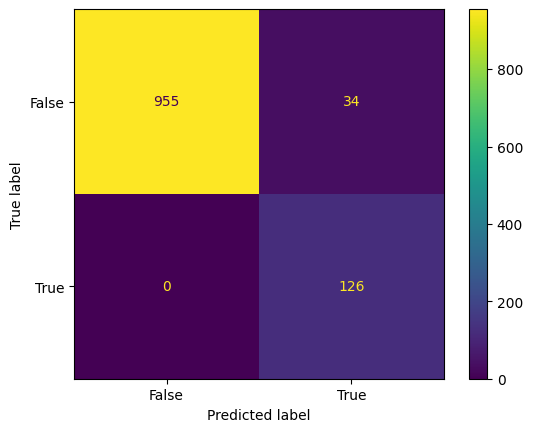

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(ypred, ytest, labels=spam_detect_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = spam_detect_model.classes_)
disp.plot()
plt.show()